In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify = pd.read_csv("spotify-2023.csv",encoding='latin-1')
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [4]:
spotify.shape

(953, 24)

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

most of the columns have no nun values

In [6]:
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


### Data Cleaning

In [7]:
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

**in_shazam_charts and key feature has some null values**

In [8]:
# filling null values with 0
spotify['in_shazam_charts'].fillna(0,inplace=True)
spotify['key'].fillna(0,inplace=True)

In [9]:
spotify.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

**now all the null values are replaced with 0**

In [10]:
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [11]:
spotify[(spotify['released_year']==2019)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,95,0,Major,55,56,82,12,0,34,5
148,Those Eyes,New West,1,2019,5,10,1507,14,411747614,24,...,120,E,Major,60,24,35,73,0,31,3
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4
183,Car's Outside,James Arthur,1,2019,10,18,794,10,265882712,38,...,150,A,Major,34,24,56,4,0,11,3
187,Circles,Post Malone,1,2019,8,30,19664,16,2132335812,391,...,120,0,Major,70,59,75,24,0,9,4
270,All Of The Girls You Loved Before,Taylor Swift,1,2019,8,23,1282,6,185240616,26,...,96,D,Major,72,40,47,71,0,13,4
326,Heart To Heart,Mac DeMarco,1,2019,5,10,1640,0,244658767,27,...,150,G#,Minor,90,64,14,67,35,11,10
368,LA CANCIï¿½,"J Balvin, Bad Bunny",2,2019,6,28,6398,31,1435127549,177,...,176,G,Major,75,43,65,15,0,11,32


**Data shown above is the tracks that released in the year 2019**

There are 36 tracks that was released in the year 2019

In [12]:
spotify[(spotify['released_year']==2019) & (spotify['artist(s)_name']=='Harry Styles')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,95,0,Major,55,56,82,12,0,34,5
695,Adore You,Harry Styles,1,2019,12,6,13454,1,1439191367,246,...,99,G#,Major,68,57,77,2,0,10,5
750,Falling,Harry Styles,1,2019,12,13,7556,0,1023187129,124,...,110,E,Major,57,6,27,84,0,9,3
756,Golden,Harry Styles,1,2019,12,13,8429,1,807015863,85,...,140,E,Minor,45,25,84,21,0,13,6


Harry Styles tracks that was released on the year 2019 is shown above

In [13]:
spotify1 = spotify.copy()

In [14]:
pd.set_option("display.max_columns",30)

In [15]:
#rename columns of interests
spotify.rename(columns={'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'},inplace=True)

In [16]:
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


Changed Column names to more understandable names

In [17]:
spotify['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

- After taking value counts we can clearly say that most of the songs was Taylor swift songs 
- Least of the songs are from Feid, Sech, Jhayco according to this dataset

In [18]:
spotify['released_year'].value_counts()

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

2022 is the most released song year 

In [19]:
#Checking duplicated values
spotify.duplicated().sum()

0

There are no duplicated values

In [20]:
spotify['streams'].max()

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [21]:
spotify['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [22]:
spotify[(spotify['streams']=='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3


This is not accurate information about streams

In [23]:
spotify[spotify['artist(s)_name']=='Taylor Swift'].value_counts().sum()

34

In [24]:
spotify[spotify['artist(s)_name']=='Harry Styles'].value_counts().sum()

17

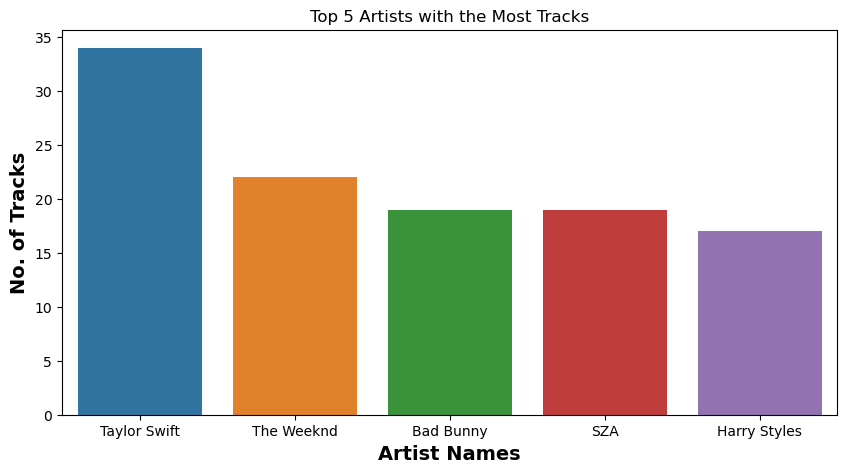

In [25]:
leading_artists = spotify['artist(s)_name'].value_counts().head(5)

plt.figure(figsize=(10, 5))


sns.barplot(x=leading_artists.index , y=leading_artists )

plt.ylabel('No. of Tracks',fontsize=14, fontweight='bold')
plt.xlabel('Artist Names',fontsize=14, fontweight='bold')
plt.title('Top 5 Artists with the Most Tracks')
plt.show()


- This shows that Taylor swift has the total record of 34 songs released
- In these 5 persons Harry Syles has the least with 17 songs

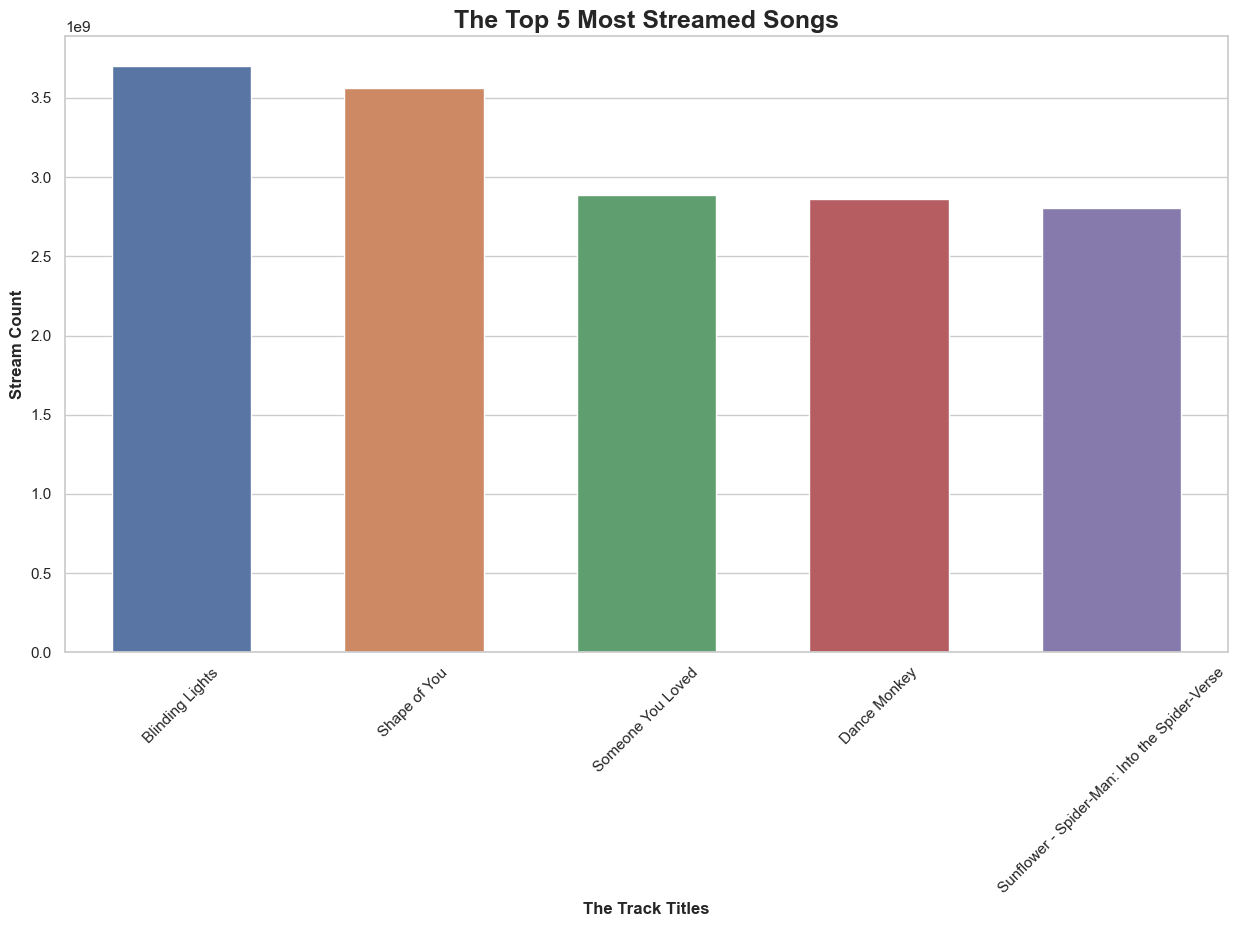

In [26]:
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')
most_streamed_songs = spotify[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')

sns.barplot(x='track_name', y='streams', data=most_streamed_songs,width=0.6)
plt.xlabel('The Track Titles',fontweight='bold')
plt.ylabel('Stream Count',fontweight='bold')
plt.title('The Top 5 Most Streamed Songs',fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


Most Streamed track is the blinding lights by The Weekend

In [27]:
spotify[spotify['track_name']=="Blinding Lights"]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,199,"3,421",20,0,171,C#,Major,50,38,80,0,0,9,7


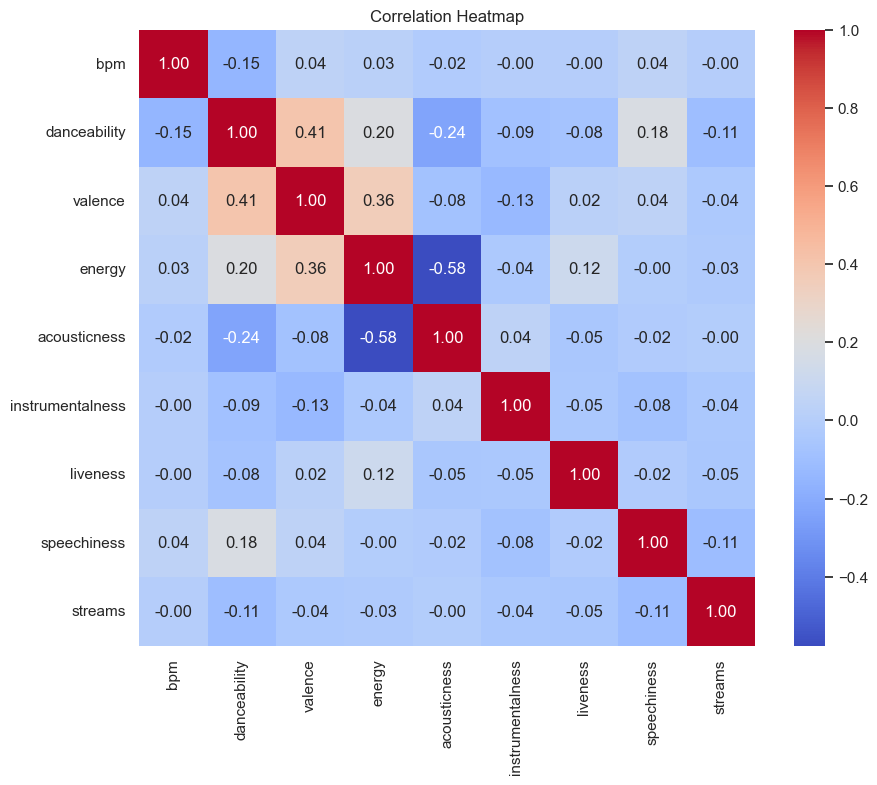

In [28]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = spotify[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

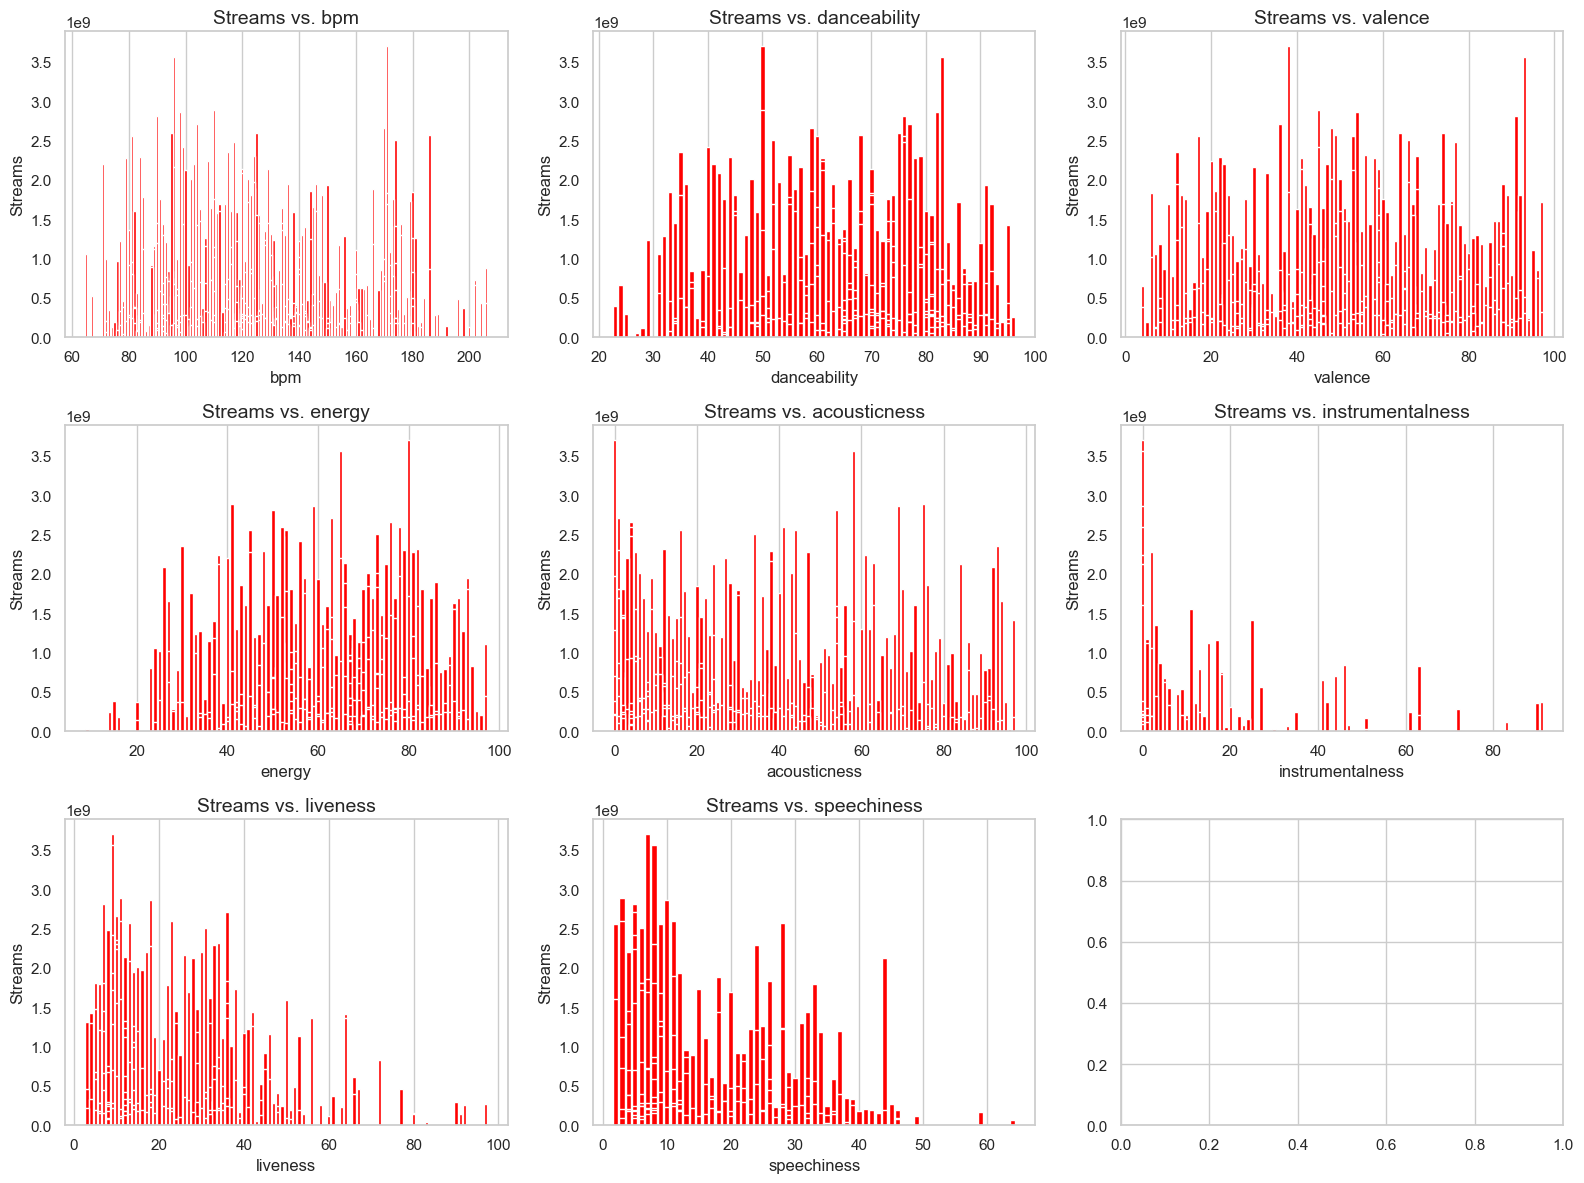

In [29]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(spotify[column], spotify['streams'], color='red')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()


A bar plot of every features crossed

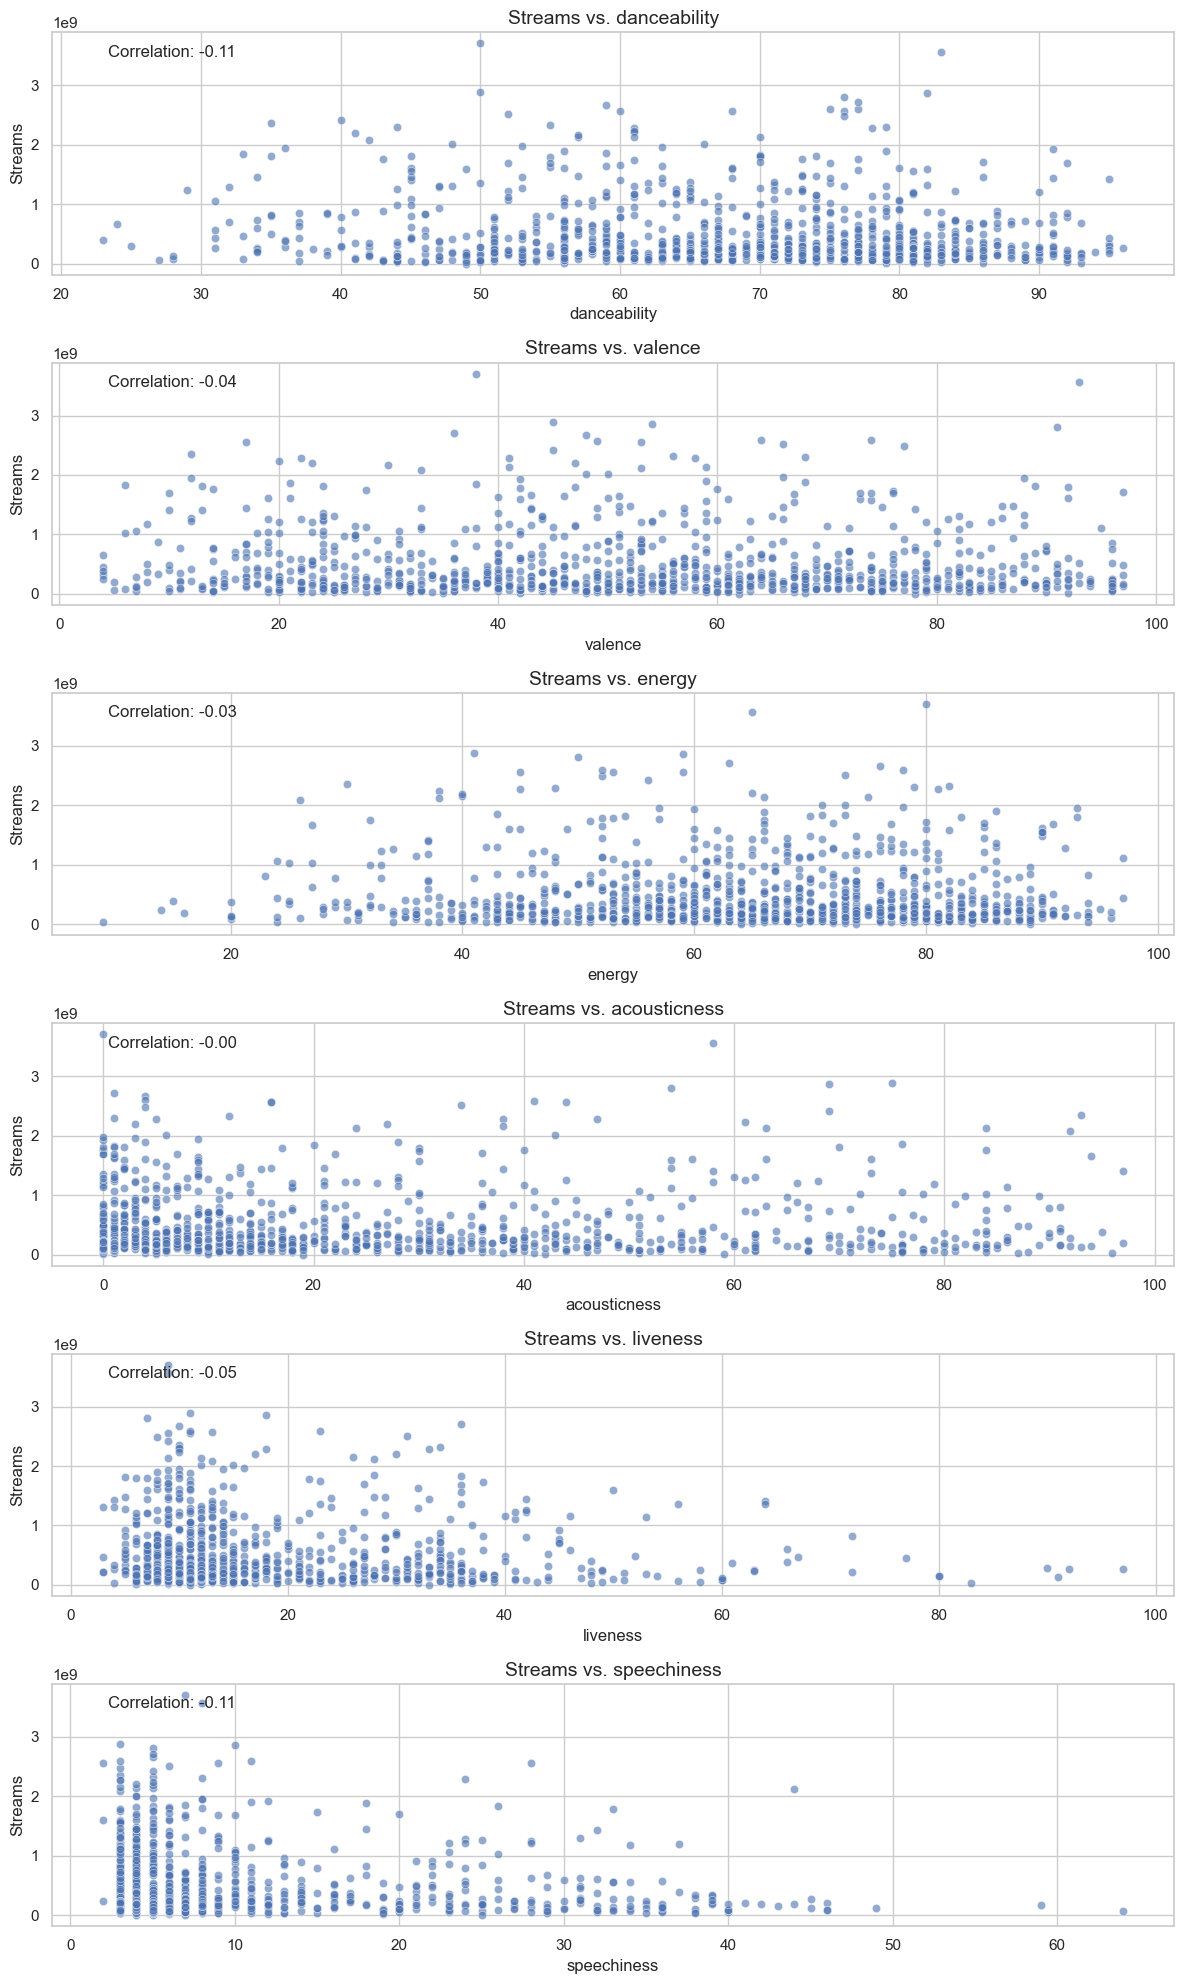

{'danceability': -0.1054568836914191,
 'valence': -0.04083136749515947,
 'energy': -0.026051488364248927,
 'acousticness': -0.004484652700684072,
 'liveness': -0.04833729577983246,
 'speechiness': -0.1123329964033855}

In [32]:
# List of features to compare with streams
features = ['danceability', 'valence', 'energy', 'acousticness', 'liveness', 'speechiness']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))

# Plotting scatter plots and printing correlation coefficients for each feature
correlations = {}
for i, feature in enumerate(features):
    sns.scatterplot(x=spotify[feature], y=spotify['streams'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Streams vs. {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Streams')
    corr = spotify['streams'].corr(spotify[feature])
    correlations[feature] = corr
    axes[i].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()

correlations

**Streams vs. Danceability**: A slightly negative correlation (r=−0.105) suggests that tracks with higher danceability tend to have slightly fewer streams, although the relationship is weak.

**Streams vs. Valence**: A very weak negative correlation (r=−0.041), implying that the mood of the track (from sad to happy) has little influence on the number of streams.

**Streams vs. Energy**: An even weaker negative correlation (r=−0.026), suggesting that the energy of a track has minimal impact on its streams.

**Streams vs. Acousticness**: Almost no correlation (r=−0.004), indicating that the acousticness of a track doesn't significantly influence its streams.

**Streams vs. Liveness**: A weak negative correlation (r=−0.048), suggesting that tracks recorded live might have slightly fewer streams.

**Streams vs. Speechiness**: A slightly negative correlation (r=−0.112), suggesting that tracks with more spoken words or rap might have slightly fewer streams.

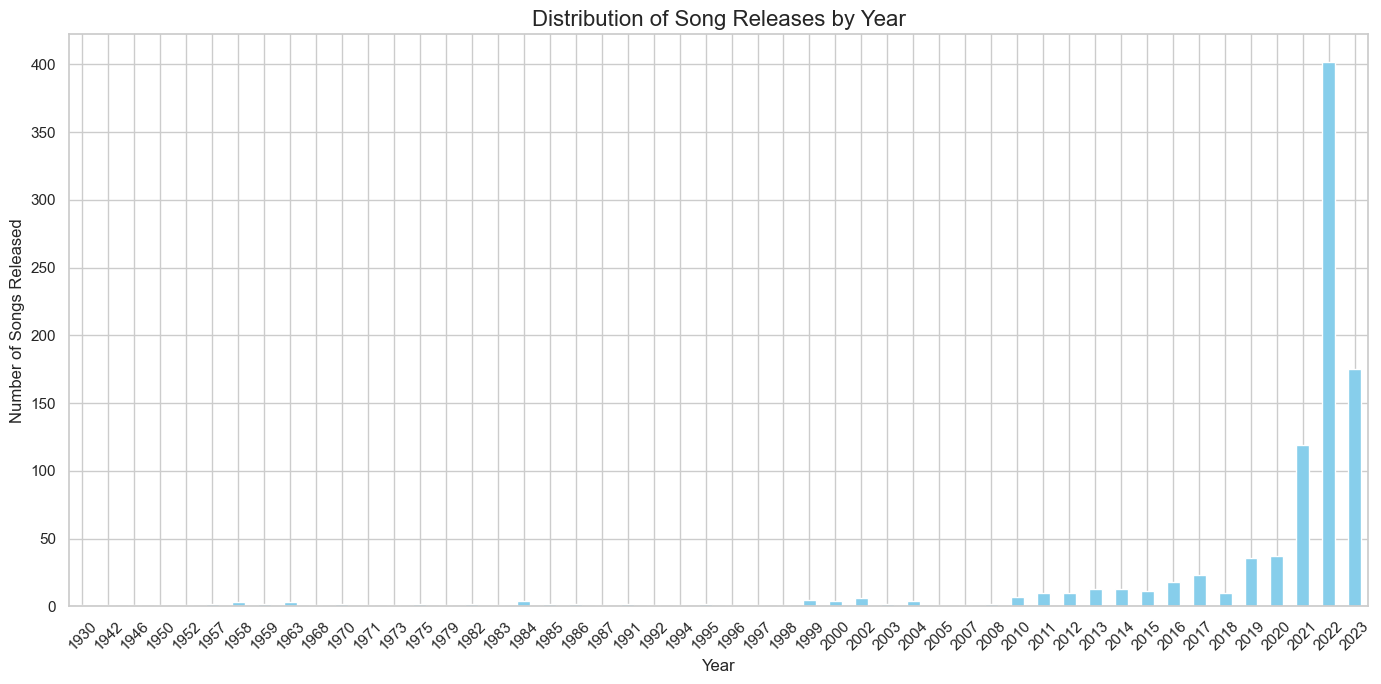

In [34]:
# Checking unique values for 'released_year', 'released_month', and 'released_day'
unique_values = {
    'released_year': spotify['released_year'].unique(),
    'released_month': spotify['released_month'].unique(),
    'released_day': spotify['released_day'].unique()
}


# Creating a 'release_date_string' column
spotify['release_date_string'] = spotify['released_year'].astype(str) + '-' + \
                                      spotify['released_month'].astype(str) + '-' + \
                                      spotify['released_day'].astype(str)

# Converting the 'release_date_string' column to datetime data type
spotify['release_date'] = pd.to_datetime(spotify['release_date_string'], errors='coerce')

# Rechecking the distribution of song releases by year
yearly_releases = spotify['release_date'].dt.year.value_counts().sort_index()

# Plotting the distribution of song releases by year
plt.figure(figsize=(14, 7))
yearly_releases.plot(kind='bar', color='skyblue')
plt.title('Distribution of Song Releases by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualisation proofs that most songs was released in 2022

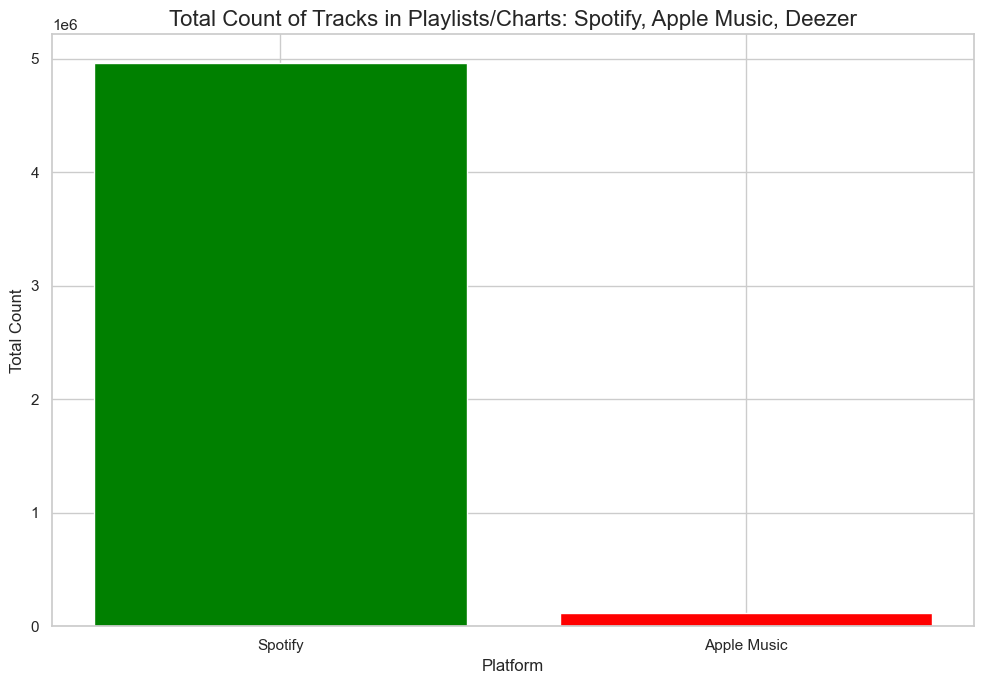

In [35]:
# Calculating the total count of tracks present in playlists/charts for Spotify and Apple Music
total_counts = {'Spotify': spotify['in_spotify_playlists'].sum() + spotify['in_spotify_charts'].sum(),
'Apple Music': spotify['in_apple_playlists'].sum() + spotify['in_apple_charts'].sum(),
}

# Plotting the total count comparison for Spotify and Apple Music
plt.figure(figsize=(10, 7))
plt.bar(total_counts.keys(), total_counts.values(), color=['green', 'red'])
plt.title('Total Count of Tracks in Playlists/Charts: Spotify, Apple Music, Deezer', fontsize=16)
plt.ylabel('Total Count')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()


In [36]:
# Identifying top 10 songs for Spotify based on their presence in playlists and charts
top_songs_spotify = spotify[['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts']]
top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
top_songs_spotify = top_songs_spotify.sort_values(by='spotify_total', ascending=False).head(10)

# Identifying top 10 songs for Apple Music based on their presence in playlists and charts
top_songs_apple = spotify[['track_name', 'artist(s)_name', 'in_apple_playlists', 'in_apple_charts']]
top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']
top_songs_apple = top_songs_apple.sort_values(by='apple_total', ascending=False).head(10)

top_songs_spotify

C:\Users\sachu\AppData\Local\Temp\ipykernel_10772\858018024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
C:\Users\sachu\AppData\Local\Temp\ipykernel_10772\858018024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']


,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,spotify_total
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,0,52898
630,Mr. Brightside,The Killers,51979,15,51994
720,Wake Me Up - Radio Edit,Avicii,50887,34,50921
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,9,50000
199,Take On Me,a-ha,44927,17,44944
55,Blinding Lights,The Weeknd,43899,69,43968
162,One Dance,"Drake, WizKid, Kyla",43257,24,43281
727,Somebody That I Used To Know,"Gotye, Kimbra",42798,0,42798
114,Everybody Wants To Rule The World,Tears For Fears,41751,25,41776
871,Sweet Child O' Mine,Guns N' Roses,41231,1,41232


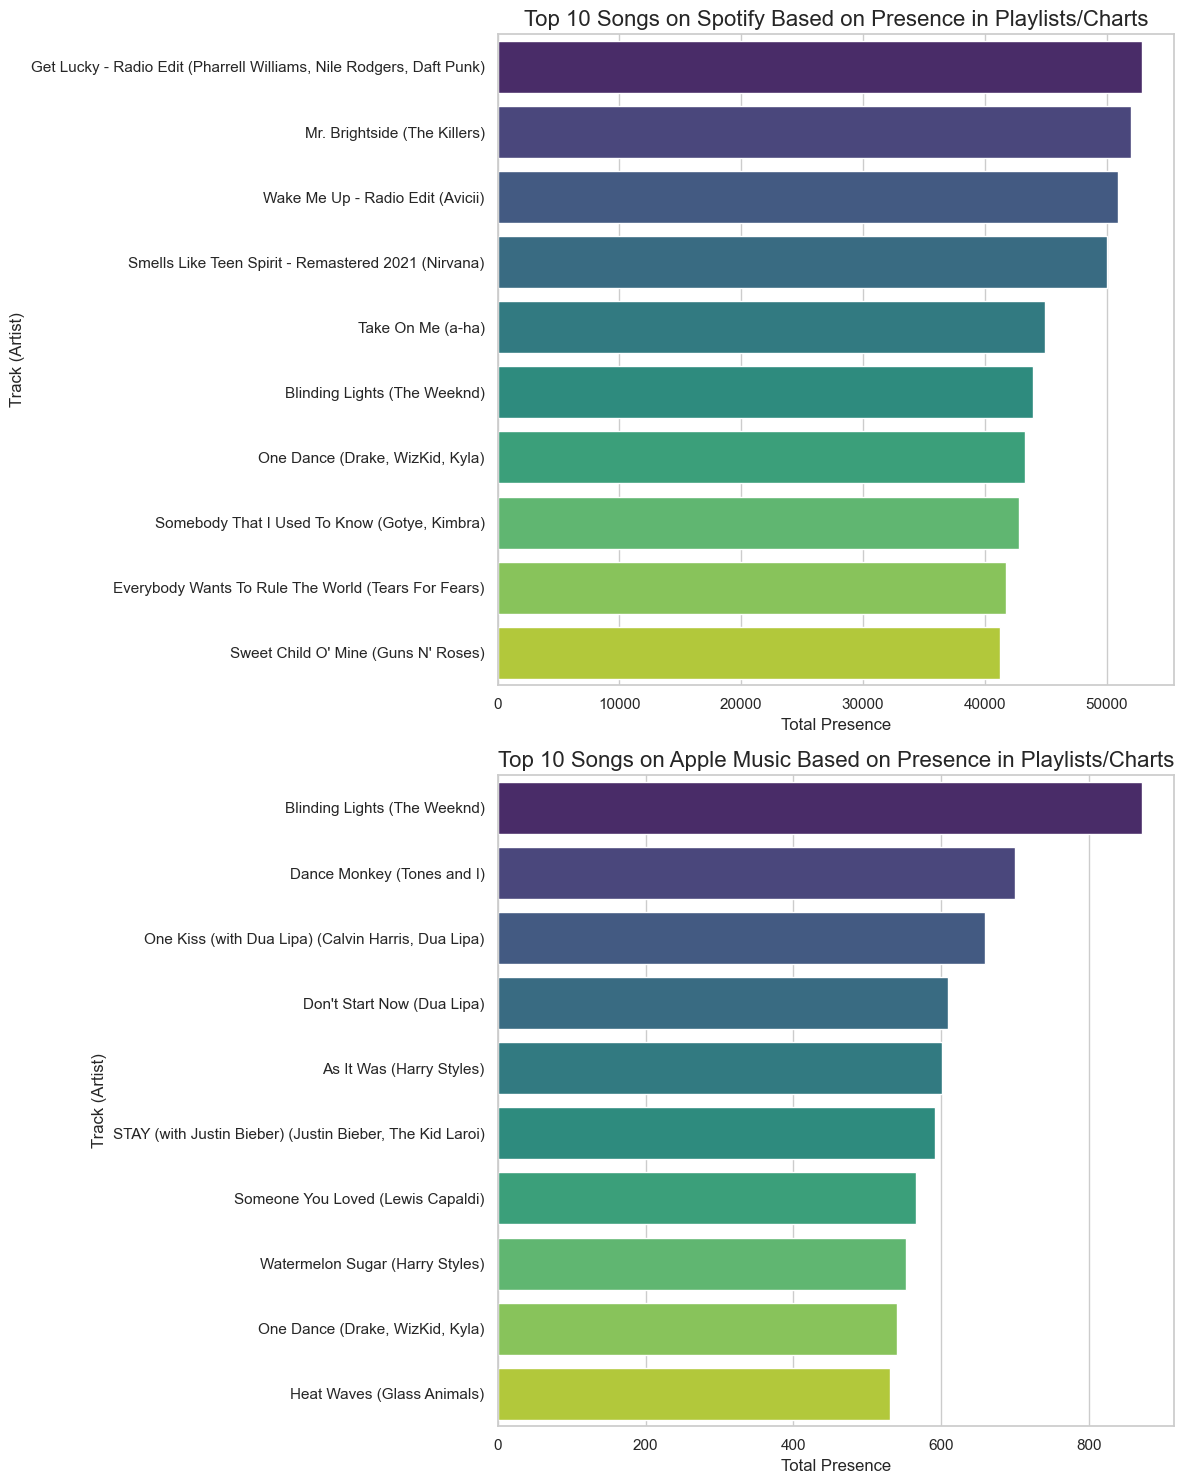

In [37]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(12, 15))

# Plotting the top 10 songs for Spotify
sns.barplot(x=top_songs_spotify['spotify_total'], y=top_songs_spotify['track_name'] + " (" + top_songs_spotify['artist(s)_name'] + ")", 
            palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Songs on Spotify Based on Presence in Playlists/Charts', fontsize=16)
axes[0].set_xlabel('Total Presence')
axes[0].set_ylabel('Track (Artist)')

# Plotting the top 10 songs for Apple Music
sns.barplot(x=top_songs_apple['apple_total'], y=top_songs_apple['track_name'] + " (" + top_songs_apple['artist(s)_name'] + ")", 
            palette="viridis", ax=axes[1])
axes[1].set_title('Top 10 Songs on Apple Music Based on Presence in Playlists/Charts', fontsize=16)
axes[1].set_xlabel('Total Presence')
axes[1].set_ylabel('Track (Artist)')

plt.tight_layout()
plt.show()